In [1]:
from tune import (
    Categorical,
    Constant,
    Integer,
    outer_cv,
    RandomForestBayesTuner,
)

Using 5 cores


Outer CV using 1 cores


[INFO/LokyProcess-5] child process calling self.run()
[INFO/LokyProcess-2] child process calling self.run()
[INFO/LokyProcess-1] child process calling self.run()
[INFO/LokyProcess-3] child process calling self.run()
[INFO/LokyProcess-4] child process calling self.run()
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
[INF

<Figure size 1000x1000 with 0 Axes>

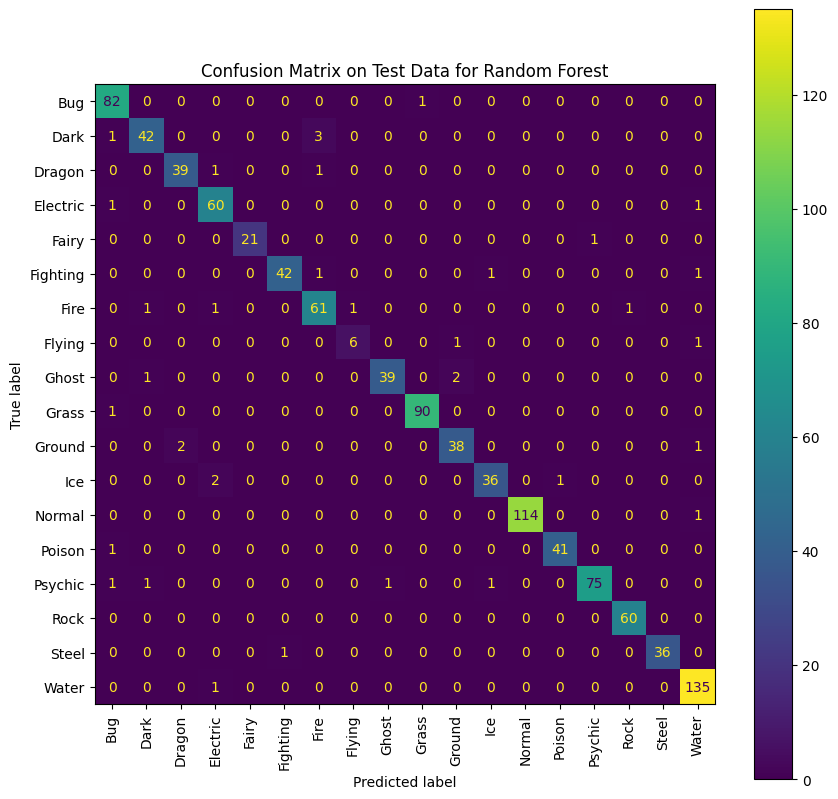

0.9649063416835928

[INFO/LokyProcess-1] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-1] process shutting down
[INFO/LokyProcess-1] process exiting with exitcode 0
[INFO/LokyProcess-3] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-2] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-4] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-5] Shutting down worker after timeout 300.000s
[INFO/LokyProcess-3] process shutting down
[INFO/LokyProcess-3] process exiting with exitcode 0
[INFO/LokyProcess-2] process shutting down
[INFO/LokyProcess-2] process exiting with exitcode 0
[INFO/LokyProcess-4] process shutting down
[INFO/LokyProcess-4] process exiting with exitcode 0
[INFO/LokyProcess-5] process shutting down
[INFO/LokyProcess-5] process exiting with exitcode 0


In [2]:
tuner = RandomForestBayesTuner()
space = dict(
    n_estimators=Constant(441), 
    criterion=Categorical(["gini", "log_loss"]), 
    max_features=Integer(low=1, high=74, prior="log-uniform"),
    max_depth=Integer(low=1, high=1054, prior="log-uniform"),
)
outer_cv(tuner=tuner, search=space, name="Random Forest")